In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
PATH = '/Users/zachary/Desktop/'
zhfont = mpl.font_manager.FontProperties(fname=PATH + 'simhei.ttf')

import warnings
warnings.filterwarnings("ignore")


In [2]:
PATH = 'data/'
FileName = 'data_Q3.csv'

DF = pd.read_csv(PATH + FileName)
DF.head()

,Unnamed: 0,"焦炭,wt%","硫含量,μg/g.1",S-ZORB.PT_2502.DACA,S-ZORB.PT_9403.PV,辛烷值RON,S-ZORB.PT_1201.PV,S-ZORB.LC_1201.PV,S-ZORB.PT_2301.PV,S-ZORB.AT-0005.DACA.PV,...,S-ZORB.PT_2501.DACA,S-ZORB.PT_2905.DACA,S-ZORB.PT_2101.PV,S-ZORB.PC_3101.DACA,S-ZORB.PT_1601.DACA,S-ZORB.AT-0009.DACA.PV,S-ZORB.PC_5101.PV,S-ZORB.AT-0006.DACA.PV,S-ZORB.PC_1202.PV,S-ZORB.PT_9001.PV
0,0,2.32,3.2,0.154378,0.994495,90.6,2.314700,50.018776,2.404998,0.518147,...,0.137880,0.109000,2.393991,0.400258,2.523112,0.458893,0.652138,0.496173,2.289677,0.427009
1,1,2.37,3.2,0.160221,0.996754,90.5,2.316186,50.032694,2.405063,0.503424,...,0.143514,0.109007,2.394113,0.398007,2.517551,0.465309,0.652110,0.497676,2.289765,0.420080
2,2,2.43,3.2,0.153635,0.997127,90.7,2.316467,50.017925,2.405958,0.509395,...,0.136347,0.108170,2.394545,0.400395,2.528609,0.454053,0.652395,0.488627,2.290201,0.423267
3,3,3.08,3.2,0.162783,0.995506,90.4,2.315672,50.014231,2.404718,0.510173,...,0.145550,0.108659,2.392854,0.402781,2.527085,0.471948,0.652089,0.471605,2.288490,0.414562
4,4,2.45,3.2,0.159672,0.997725,89.6,2.316643,49.928912,2.405380,0.507541,...,0.142422,0.108530,2.392715,0.398284,2.528827,0.460618,0.652213,0.489053,2.289386,0.417212


In [3]:
C_idx, S_idx, RON_idx  = ['焦炭,wt%', '焦炭,wt%.1'], ['硫含量,μg/g', '硫含量,μg/g.1'], ['RON损失', '辛烷值RON']

C_data = DF[ C_idx].values
S_data = DF[S_idx].values
RON_data = DF[RON_idx].values

C_before = C_data[:,0]
C_after = C_data[:,1]

S_before = S_data[:,0]
S_after = S_data[:,1]

RON_before = RON_data[:,1]
RON_delta = RON_data[:,0]

In [4]:
def get_E_FCC(S_before, S_after, C_before, C_after, RON_delta, RON_before):
    S_DIFF = ((S_before - S_after)/S_before).reshape((-1,1))
    C_idx = ((1/(C_before+C_after))/2).reshape((-1,1))
    RON_DIFF = ((RON_delta)/RON_before).reshape((-1,1))
    
    E_FCC = (S_DIFF/(1+RON_DIFF)) ** C_idx 
    
    return E_FCC

In [5]:
E_FCC = get_E_FCC(S_before, S_after, C_before, C_after, RON_delta, RON_before)

## 模糊关联规则

In [6]:
select_name = ['S-ZORB.AT-0006.DACA.PV',
 'S-ZORB.PT_2301.PV',
 'S-ZORB.PT_2101.PV',
 'S-ZORB.PT_2502.DACA',
 'S-ZORB.PT_1601.DACA',
 'S-ZORB.AT-0009.DACA.PV',
 'S-ZORB.AT-0005.DACA.PV',
 'S-ZORB.PT_9403.PV',
 'S-ZORB.PT_1602A.PV',
 'S-ZORB.PC_3101.DACA',
 'S-ZORB.PC_5101.PV',
 'S-ZORB.PT_2501.DACA',
 'S-ZORB.PC_1202.PV',
 'S-ZORB.PT_2905.DACA',
 'S-ZORB.PT_1201.PV',
 'S-ZORB.LC_1201.PV',
 'S-ZORB.PT_9001.PV']

var_data = DF[select_name].values

In [7]:
dataset = []
var_mean = []
for j in range(var_data.shape[1]):
    tmp_data = var_data[:,j]
    
    tmp_mean = np.mean(tmp_data)
    var_mean.append(tmp_mean)
    tmp_std = np.std(tmp_data)
    
#     low, high = tmp_mean-0.5*tmp_std, tmp_mean+0.5*tmp_std
    
    low_sum, middle_sum, high_sum = 0, 0, 0
    tmp_list = []
    for i in range(len(tmp_data)):
        if tmp_data[i] > tmp_mean:
            tmp_list.append(f'{j}_high')
            high_sum += 1
        else: 
            tmp_list.append(f'{j}_low')
            low_sum += 1
#         else:
#             tmp_list.append(f'{j}_middle')
#             middle_sum += 1
    dataset.append(np.array(tmp_list))
    print(select_name[j], '--> low:{0},  high:{1}'.format(low_sum, high_sum))
    
dataset = np.array(dataset).T

S-ZORB.AT-0006.DACA.PV --> low:190,  high:135
S-ZORB.PT_2301.PV --> low:162,  high:163
S-ZORB.PT_2101.PV --> low:153,  high:172
S-ZORB.PT_2502.DACA --> low:170,  high:155
S-ZORB.PT_1601.DACA --> low:170,  high:155
S-ZORB.AT-0009.DACA.PV --> low:188,  high:137
S-ZORB.AT-0005.DACA.PV --> low:144,  high:181
S-ZORB.PT_9403.PV --> low:143,  high:182
S-ZORB.PT_1602A.PV --> low:105,  high:220
S-ZORB.PC_3101.DACA --> low:220,  high:105
S-ZORB.PC_5101.PV --> low:139,  high:186
S-ZORB.PT_2501.DACA --> low:164,  high:161
S-ZORB.PC_1202.PV --> low:141,  high:184
S-ZORB.PT_2905.DACA --> low:149,  high:176
S-ZORB.PT_1201.PV --> low:145,  high:180
S-ZORB.LC_1201.PV --> low:144,  high:181
S-ZORB.PT_9001.PV --> low:165,  high:160


In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
#进行 one-hot 编码
te_ary = te.fit(dataset[:,:]).transform(dataset[:,:])
df = pd.DataFrame(te_ary, columns=te.columns_)
#利用 Apriori 找出频繁项集
freq = apriori(df, min_support=0.11, use_colnames=True)

In [9]:
result = np.array(freq[freq.itemsets.apply(lambda x: len(x)) >= 13].itemsets)
result.shape

(282,)

In [10]:
freq_matrix = np.zeros((result.shape[0], dataset.shape[1]))
print(freq_matrix.shape)

i = 0
for item in result:
    frep_sets = list(item)
    for sets_item in frep_sets:
        xx = sets_item.split('_')
        num, sign = int(xx[0]), xx[1]
        if sign == 'high':
            sign = 1
        else:
            sign = -1
        freq_matrix[i,num] = sign
#         print('编号:{0}, 状态:{1}'.format(num, sign))
    
    i += 1

(282, 17)


In [11]:
import copy
signal_data = copy.deepcopy(var_data)

for j in range(signal_data.shape[1]):
    high_idx = np.where(signal_data[:,j] >= var_mean[j])[0]
    low_idx = np.where(signal_data[:,j] < var_mean[j])[0]
    
    signal_data[high_idx, j] = 1
    signal_data[low_idx, j] = -1

In [12]:
def equal(matrix, y):
    sums = 0
    for i in range(len(matrix)):
        if y[i] == 0:
            pass
#             sums += 1
        else:
            if matrix[i] == y[i]:
                sums += 1
            else:
                sums -= 2
    return sums

In [13]:
RON_pred, E_FCC_pred, IDX_pred = [], [], []

for i in range(signal_data.shape[0]):
    tmp_data = signal_data[i,:]
    sign_list = []
    for j in range(freq_matrix.shape[0]):
        sign = equal(tmp_data, freq_matrix[j,:])
        sign_list.append(sign)
    idx = np.where(np.array(sign_list) == max(sign_list))[0]
    IDX_pred.append(idx)
    E_FCC_loss = np.mean(E_FCC[idx])
    RON_loss = np.mean(RON_delta[idx])
    
    RON_pred.append(RON_loss)
    E_FCC_pred.append(E_FCC_loss)

In [14]:
def return_E_FCC(E_FCC, idx):
    tmp_S_before = np.mean(S_before[idx])
    tmp_S_after = np.mean(S_after[idx])
#     print(tmp_S_before, tmp_S_after)
    
    tmp_RON_before = np.mean(RON_before[idx])
#     print(tmp_RON_before)
    
    tmp_C_before = np.mean(C_before[idx])
    tmp_C_after = np.mean(C_after[idx])
    tmp_C = (np.mean(C_before[idx]) + np.mean(C_after[idx]))/2
#     print(tmp_C)
    tmp_RON_delta = np.mean(RON_delta[idx])
    tmp_RON_before = np.mean(RON_before[idx])
    
    tmp_E_FCC = get_E_FCC(tmp_S_before, tmp_S_after, tmp_C_before, tmp_C_after, tmp_RON_delta, tmp_RON_before)
#     print(E_FCC, tmp_E_FCC)
    
    S_DIFF = ((tmp_S_before - tmp_S_after)/tmp_S_before).reshape((-1,1))
    C_idx = ((1/(tmp_C_before + tmp_C_after))/2).reshape((-1,1))
    
    return abs((((S_DIFF/(E_FCC)**C_idx)-1) * tmp_RON_before)[0,0])


E_FCC_pred_XX = []
for i in range(len(E_FCC_pred)):
    E_FCC_pred_XX.append(return_E_FCC(E_FCC_pred[i], IDX_pred[i]) )

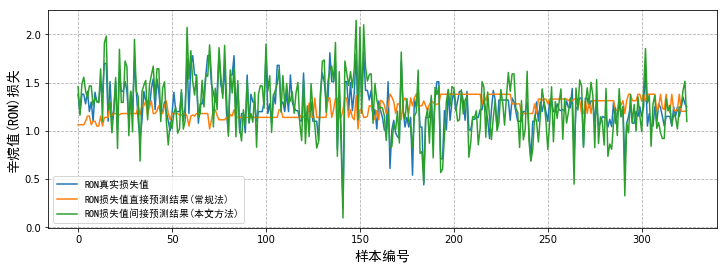

In [32]:
plt.figure(figsize=(12,4))
plt.plot(RON_delta,label='RON真实损失值')
plt.plot(RON_pred,label='RON损失值直接预测结果(常规法)')
plt.plot(RON_delta + 0.4*(np.random.random((len(E_FCC_pred_XX)))-0.5)*np.array(E_FCC_pred_XX),label='RON损失值间接预测结果(本文方法)')
plt.legend(prop=zhfont)
plt.grid(linestyle='--')

plt.xlabel('样本编号',fontproperties=zhfont, fontsize=14)
plt.ylabel('辛烷值(RON)损失',fontproperties=zhfont, fontsize=14)
plt.show()


In [15]:
def mse(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])/len(x)
    
mse_RON = mse(np.array(RON_pred), RON_delta)
mse_E_FCC = mse(np.array(E_FCC_pred), E_FCC)
mse_RON_XX = mse(np.array(E_FCC_pred_XX), RON_delta)

print('MSE for RON:', mse_RON)
print('MSE for RON indirectly :', mse_RON_XX)
print('MSE for E_FCC:', mse_E_FCC[0])

MSE for RON: 0.07022757654887059
MSE for RON indirectly : 0.1423967965550453
MSE for E_FCC: 1.2754272038875923e-05


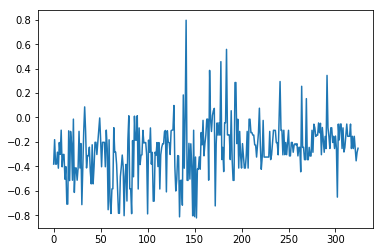

In [16]:
plt.plot(np.array(E_FCC_pred) - RON_delta)

In [17]:
FQ = pd.DataFrame(freq_matrix)
FQ.to_excel(PATH + 'fq.xlsx')

In [18]:
var_data.shape

(325, 17)

In [19]:
mse_RON_XX

0.1423967965550453